In [2]:
import paddle
from paddle.vision.models import resnet50
from paddle.vision.transforms import Compose, Resize, ToTensor
from paddle.io import DataLoader, Dataset
import numpy as np

In [ ]:
transform = Compose(
    [
        Resize(size=256),
        ToTensor(),
        # 可以添加更多的数据增强和预处理步骤
    ]
)

In [ ]:
import os.path as osp
import copy
import numpy as np
from paddle.io import Dataset


class ImageNet(Dataset):
    """读取ImageNet格式的分类数据集，并对样本进行相应的处理。

    Args:
        data_dir (str): 数据集所在的目录路径。
        file_list (str): 描述数据集图片文件和类别id的文件路径（文本内每行路径为相对data_dir的相对路）。
        label_list (str): 描述数据集包含的类别信息文件路径。
        transforms (paddlex.transforms): 数据集中每个样本的预处理/增强算子。
        num_workers (int|str): 数据集中样本在预处理过程中的线程或进程数。默认为'auto'。当设为'auto'时，根据
            系统的实际CPU核数设置`num_workers`: 如果CPU核数的一半大于8，则`num_workers`为8，否则为CPU核
            数的一半。
        shuffle (bool): 是否需要对数据集中样本打乱顺序。默认为False。
    """

    def __init__(self, data_dir, file_list, label_list, transforms=None, num_workers="auto", shuffle=False):
        super(ImageNet, self).__init__()
        self.transforms = copy.deepcopy(transforms)
        # TODO batch padding
        self.batch_transforms = None
        self.num_workers = get_num_workers(num_workers)
        self.shuffle = shuffle
        self.file_list = list()
        self.labels = list()

        with open(label_list, encoding=get_encoding(label_list)) as f:
            for line in f:
                item = line.strip()
                self.labels.append(item)
        logging.info("Starting to read file list from dataset...")
        with open(file_list, encoding=get_encoding(file_list)) as f:
            for line in f:
                items = line.strip().split()
                if len(items) > 2:
                    raise Exception(
                        "A space is defined as the delimiter to separate the image and label path, "
                        "so the space cannot be in the image or label path, but the line[{}] of "
                        " file_list[{}] has a space in the image or label path.".format(line, file_list)
                    )
                items[0] = path_normalization(items[0])
                if not is_pic(items[0]):
                    continue
                full_path = osp.join(data_dir, items[0])
                if not osp.exists(full_path):
                    raise IOError("The image file {} does not exist!".format(full_path))
                self.file_list.append({"image": full_path, "label": np.asarray(items[1], dtype=np.int64)})
        self.num_samples = len(self.file_list)
        logging.info("{} samples in file {}".format(len(self.file_list), file_list))

    def __getitem__(self, idx):
        sample = copy.deepcopy(self.file_list[idx])
        outputs = self.transforms(sample)

        return outputs

    def __len__(self):
        return len(self.file_list)

In [ ]:
mport random
import os
from ysf.utils import split_filename
random.seed(0)
# # 指定图片和XML文件所在的文件夹
# image_folder = "JPEGImages"
# xml_folder = "Annotations"
JPEGImages_dir = r"/home/aistudio/pianyi/JPEGImages"

img_list = [name for name in os.listdir(JPEGImages_dir)]
random.shuffle(img_list)

num = len(img_list)
train_list = img_list[:int(0.7*num)]
val_list = img_list[int(0.7*num):int(0.9*num)]
test_list = img_list[int(0.9*num):]

labels_list = ['yinjiao_pianyi', 'xinpian_pianyi', 'xinpian']
train_txt = r"/home/aistudio/pianyi/train_list.txt"
val_txt = r"/home/aistudio/pianyi/val_list.txt"
test_txt = r"/home/aistudio/pianyi/test_list.txt"
labels_txt = r"/home/aistudio/pianyi/labels.txt"

!rm -rf train_txt
!rm -rf val_txt
!rm -rf test_txt
!rm -rf labels_txt


with open(train_txt, "w") as file:
    for names in train_list:
        _name,_suffix = split_filename(names)
        image_path = "JPEGImages/"+names
        xml_path = "Annotations/"+_name+".xml"
        # 将图片和XML文件的路径写入TXT文件中
        file.write(f"{image_path} {xml_path}\n") 

with open(val_txt, "w") as file:
    for names in val_list:
        _name,_suffix = split_filename(names)
        image_path = "JPEGImages/"+names
        xml_path = "Annotations/"+_name+".xml"
        # 将图片和XML文件的路径写入TXT文件中
        file.write(f"{image_path} {xml_path}\n") 

with open(test_txt, "w") as file:
    for names in test_list:
        _name,_suffix = split_filename(names)
        image_path = "JPEGImages/"+names
        xml_path = "Annotations/"+_name+".xml"
        # 将图片和XML文件的路径写入TXT文件中
        file.write(f"{image_path} {xml_path}\n") 

with open(labels_txt, "w") as file:
    for names in labels_list:
        file.write(f"{names}\n") 

print("done!")

In [1]:
import paddle
from paddle import nn
from paddle.vision.models import LeNet
from paddle.vision.transforms import Compose, Normalize, ToTensor
from paddle.io import Dataset, DataLoader
from paddle.metric import Accuracy

# 假设你使用的模型是LeNet
model = LeNet()

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = paddle.optimizer.Adam(parameters=model.parameters())

I0513 09:55:08.725214 4221450944 kernel_dispatch.h:102] Get BackendSet from tensor
I0513 09:55:08.726555 4221450944 kernel_dispatch.h:102] Get BackendSet from tensor
I0513 09:55:08.727167 4221450944 kernel_dispatch.h:102] Get BackendSet from tensor
I0513 09:55:08.727346 4221450944 kernel_dispatch.h:102] Get BackendSet from tensor
I0513 09:55:08.727586 4221450944 kernel_dispatch.h:102] Get BackendSet from tensor


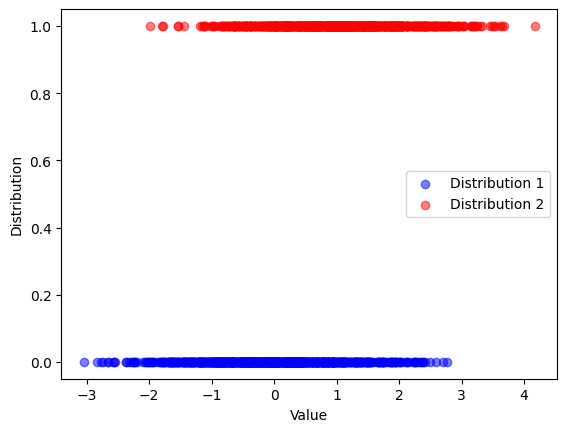

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置正态分布的参数
mu1, mu2 = 0, 1  # 均值
sigma1, sigma2 = 1, 1  # 标准差

# 生成随机数据
np.random.seed(0)  # 为了可重复性设置随机种子
data1 = np.random.normal(mu1, sigma1, 1000)
data2 = np.random.normal(mu2, sigma2, 1000)

# 绘制散点图
plt.scatter(data1, np.zeros_like(data1), color="blue", alpha=0.5, label="Distribution 1")
plt.scatter(data2, np.ones_like(data2), color="red", alpha=0.5, label="Distribution 2")

# 设置x轴和y轴的标签（这里y轴只是用于区分两个分布）
plt.xlabel("Value")
plt.ylabel("Distribution")

# 添加图例
plt.legend()

# 显示图形
plt.show()

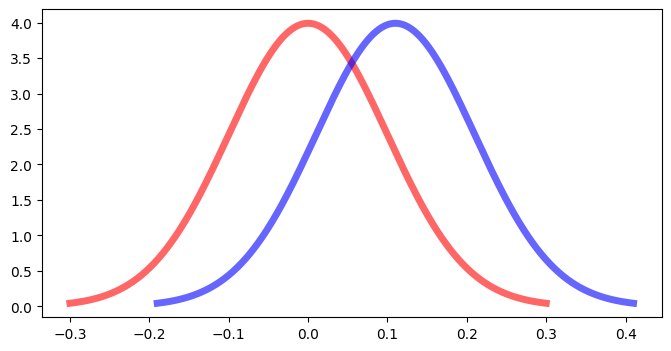

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 设置高斯分布的均值和标准差
mu, sigma = 0, 0.1  # 均值和标准差

# 生成高斯分布的数据点
s = np.random.normal(mu, sigma, 1000)

# 计算高斯分布的概率密度函数（PDF）
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma**2))

# 绘制高斯分布的概率密度函数
plt.figure(figsize=(8, 4))
plt.plot(x, pdf, "r-", lw=5, alpha=0.6, label="高斯分布 pdf")

plt.plot(x + 0.11, pdf, "b-", lw=5, alpha=0.6, label="高斯分布 pdf")

# 显示图形
plt.show()